In [2]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#target_df = pd.read_csv('target.csv')

In [3]:
#target_df.sort_values('fips', inplace= True, ignore_index = True)

In [4]:
#target_df

,fips,cases,deaths
0,1001.0,1427,82
1,1003.0,5163,110
2,1005.0,1057,13
3,1007.0,1142,4
4,1009.0,1081,0
...,...,...,...
2880,56035.0,110,0
2881,56037.0,566,0
2882,56039.0,3380,19
2883,56041.0,232,0


In [5]:
target1 = pd.read_csv('data/current_target.csv')

In [7]:
df = pd.read_csv('data/tues_clean1.csv')

In [8]:
df.rename(columns = {'FIPS': 'fips'}, inplace = True)

In [9]:
df1 = pd.merge(df, target1, how='left', on = 'fips')

In [10]:
df1.isnull().sum()

fips                           0
Pop_Dens                       0
perc_below_pov                 0
perc_disabled                  0
perc_minority                  0
percent_multiunit_housing      0
perc_overcrowded               0
perc_no_vehicle                0
perc_group_quarters            0
perc_fair_poor_health          0
perc_smokers                   0
perc_obese                     0
perc_phys_inactive             0
prev_hosp_rate_medicare        0
air_pollution                  0
unemployed                     0
age_adjusted_mortality         0
perc_diab                      0
perc_insuf_sleep               0
health_costs                   0
med_house_income               0
wnw_seg                        0
Population                     0
perc_fem                       0
perc_rural                     0
pcp_rate_100k                  0
65_older                       0
17_younger                     0
uninsured                      0
lim_eng                        0
date      

In [11]:
df1.fillna(value = 0, inplace = True)

df1

,fips,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,date,county,state,cases,deaths
0,1001,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,...,74.0,14.65,24.30,8.05,0.80,2020-05-12,Autauga,Alabama,91.0,4.0
1,1003,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,...,117.0,19.60,21.80,11.10,0.65,2020-05-12,Baldwin,Alabama,227.0,7.0
2,1005,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,...,69.0,18.00,21.10,12.10,1.55,2020-05-12,Barbour,Alabama,67.0,1.0
3,1007,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,...,128.0,15.85,20.75,9.95,0.35,2020-05-12,Bibb,Alabama,46.0,1.0
4,1009,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,...,33.0,17.90,23.30,12.50,1.80,2020-05-12,Blount,Alabama,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,...,88.0,10.60,26.85,12.00,1.85,2020-05-12,Sweetwater,Wyoming,20.0,0.0
3138,56039,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,...,229.0,13.55,19.00,12.50,3.95,2020-05-12,Teton,Wyoming,98.0,1.0
3139,56041,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,...,106.0,12.35,29.45,12.10,1.00,2020-05-12,Uinta,Wyoming,9.0,0.0
3140,56043,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,...,97.0,20.80,23.90,16.20,0.50,2020-05-12,Washakie,Wyoming,7.0,0.0


In [12]:
df1.to_csv('data/socio_health_covid1.csv', index =False)

In [13]:
y1df = df1['cases']
y1 =y1df.values

In [14]:
y2df = (df1['cases']/df1['Population'])
y2 = y2df.values

In [41]:
y3df = (df1['deaths']/df1['cases'])
y3 = y3df.values

In [45]:
y3df.isnull().sum()

254

In [46]:
y3df.fillna(value=0, inplace = True)

In [47]:
y3df.isnull().sum()

0

In [16]:
Xdf = df.drop(columns = ['fips', 'Population'])

In [17]:
X = Xdf.values

In [34]:
Xdf

,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,perc_smokers,...,health_costs,med_house_income,wnw_seg,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng
0,92.859967,15.4,19.3,25.0,3.8,1.4,5.6,1.0,18,19,...,10674.0,54487.0,24.0,51.3,42.0,74.0,14.65,24.30,8.05,0.80
1,130.901947,10.6,14.0,17.0,18.3,1.3,3.4,1.4,18,17,...,9537.0,56460.0,31.0,51.5,42.3,117.0,19.60,21.80,11.10,0.65
2,29.132150,28.9,22.2,53.9,1.3,3.4,9.2,11.2,26,22,...,9791.0,32884.0,22.0,46.9,67.8,69.0,18.00,21.10,12.10,1.55
3,36.190214,14.0,16.7,25.4,2.4,0.8,6.0,9.3,20,20,...,10756.0,43079.0,42.0,46.4,68.4,128.0,15.85,20.75,9.95,0.35
4,89.395591,14.4,14.2,12.9,0.9,1.6,4.2,0.9,21,20,...,10326.0,47213.0,24.0,50.6,90.0,33.0,17.90,23.30,12.50,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,4.231045,12.0,12.3,20.4,5.5,1.9,2.4,1.3,15,18,...,8419.0,74546.0,29.0,48.2,10.9,88.0,10.60,26.85,12.00,1.85
3138,5.769301,7.1,7.0,18.4,7.5,7.2,2.4,4.0,12,14,...,6621.0,84118.0,27.0,48.4,46.4,229.0,13.55,19.00,12.50,3.95
3139,9.899987,12.5,17.2,12.5,5.8,2.8,3.9,1.3,16,18,...,8185.0,64713.0,16.0,49.4,43.1,106.0,12.35,29.45,12.10,1.00
3140,3.631169,12.4,14.9,18.0,1.1,1.8,5.0,2.0,16,16,...,8707.0,49533.0,28.0,49.7,36.0,97.0,20.80,23.90,16.20,0.50


### Predicting Cummulative Cases (raw)

In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xdf, y1df)

In [19]:
rf = RandomForestRegressor()
rf.fit(X_train1, y_train1)

rf.score(X_test1, y_test1)

0.42188198375792074

Text(0.5, 0, 'Average contribution of information gain')

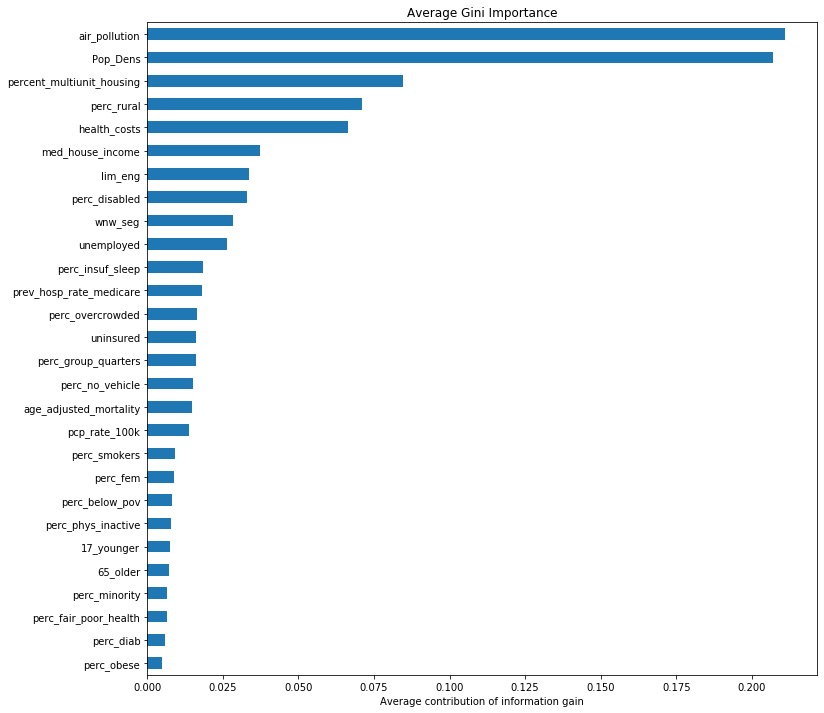

In [20]:
rf.fit(X_train1, y_train1)

feature_scores = pd.Series(rf.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(12,12))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

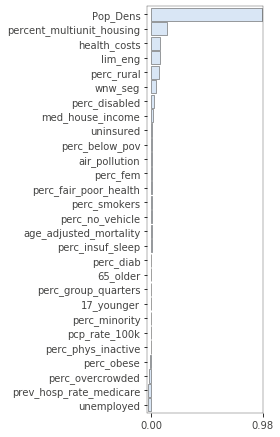

In [21]:
imp = importances(rf, X_test1, y_test1, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [22]:
lr = LinearRegression()
lr.fit(X_train1, y_train1)

lr.score(X_test1, y_test1)

0.23238686208961845

### Predicting Cummulative cases per population

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xdf, y2df)

In [54]:
rf = RandomForestRegressor()
rf.fit(X_train2, y_train2)

rf.score(X_test2, y_test2)

0.19309498422045435

Text(0.5, 0, 'Average contribution of information gain')

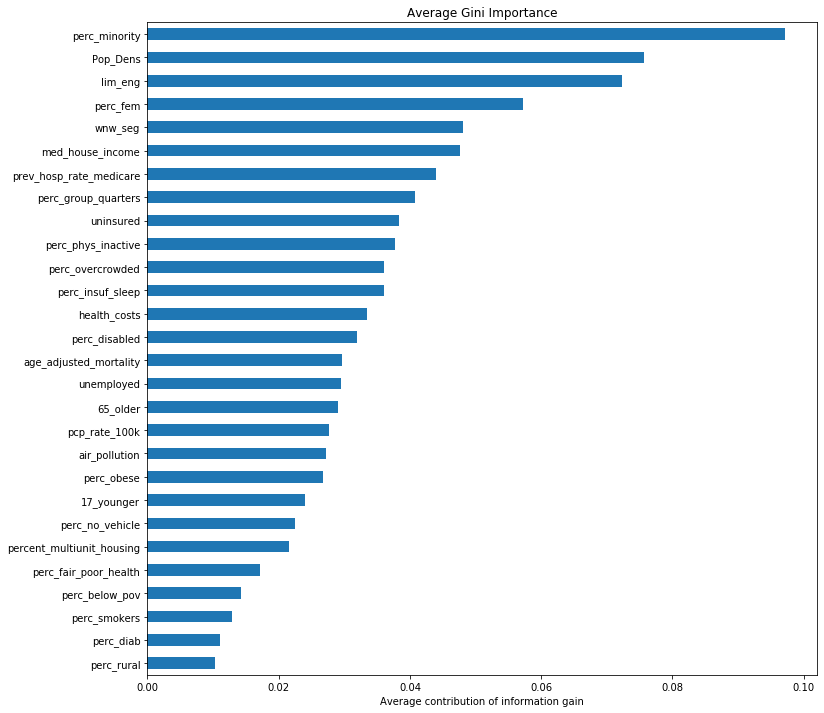

In [55]:
rf.fit(X_train2, y_train2)

feature_scores = pd.Series(rf.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(12,12))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

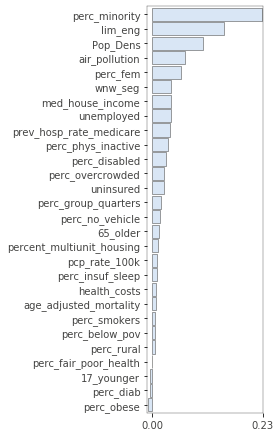

In [56]:
imp = importances(rf, X_test2, y_test2, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [57]:
lr = LinearRegression()
lr.fit(X_train2, y_train2)

lr.score(X_test2, y_test2)

0.12013140451497062

### Predicting Cummulative Deaths rate

In [58]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xdf, y3df)

In [59]:
rf = RandomForestRegressor()
rf.fit(X_train3, y_train3)

rf.score(X_test3, y_test3)

-0.03199838785070841

Text(0.5, 0, 'Average contribution of information gain')

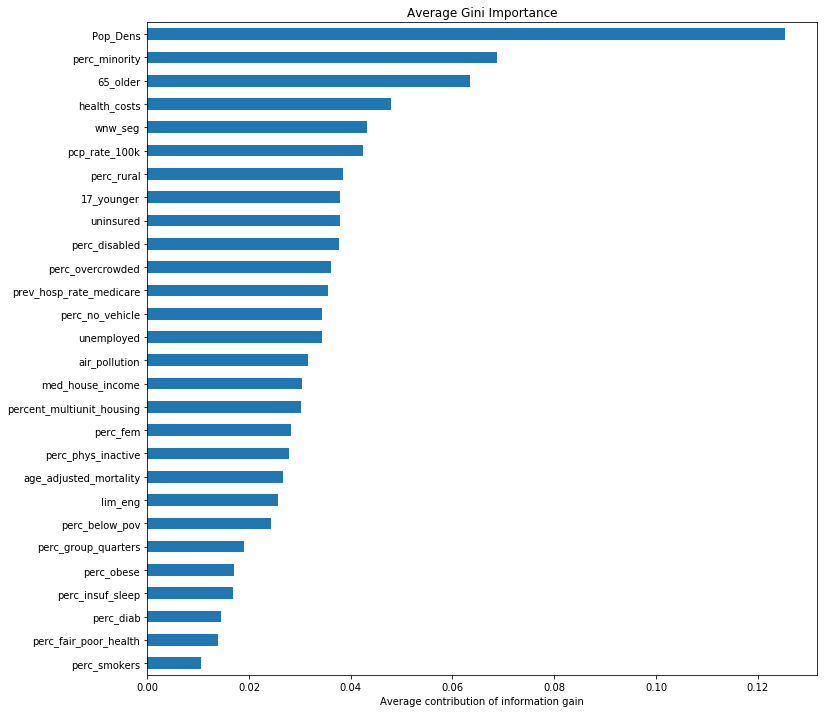

In [60]:
rf.fit(X_train3, y_train3)

feature_scores = pd.Series(rf.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(12,12))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

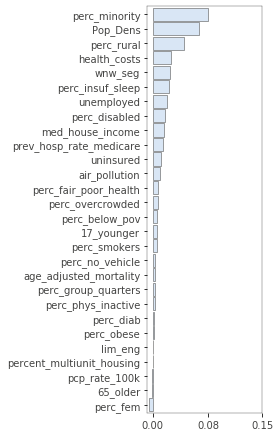

In [61]:
imp = importances(rf, X_test3, y_test3, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [62]:
lr = LinearRegression()
lr.fit(X_train3, y_train3)

lr.score(X_test3, y_test3)

0.01597439358599584

# MORE CLEANING

In [ ]:
Xdf.drop(columns = ['perc_group_quarters'], inplace =True)

In [ ]:
Xdf.drop(columns = ['pcp_rate_100k'], inplace =True)

In [ ]:
Xdf.drop(columns = ['17_younger'], inplace =True)

In [360]:
Xdf.drop(columns = ['prev_hosp_rate_medicare'], inplace =True)

In [380]:
Xdf.columns

Index(['Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle',
       'perc_fair_poor_health', 'perc_smokers', 'perc_obese',
       'perc_phys_inactive', 'air_pollution', 'unemployed',
       'age_adjusted_mortality', 'perc_diab', 'perc_insuf_sleep',
       'health_costs', 'med_house_income', 'wnw_seg', 'perc_fem', 'perc_rural',
       '65_older', 'uninsured', 'lim_eng'],
      dtype='object')

In [394]:
X1df = Xdf[['Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle', 'perc_obese',
       'perc_phys_inactive', 'air_pollution', 'unemployed',
       'age_adjusted_mortality', 'perc_diab', 'perc_insuf_sleep',
       'health_costs', 'med_house_income', 'wnw_seg', 'perc_fem', 'perc_rural',
       '65_older', 'uninsured', 'lim_eng']]

In [395]:
X2df= Xdf[['Pop_Dens', 'perc_below_pov', 'perc_disabled', 'perc_minority',
       'percent_multiunit_housing', 'perc_overcrowded', 'perc_no_vehicle',
       'perc_fair_poor_health', 'perc_smokers', 'perc_obese',
       'perc_phys_inactive', 'air_pollution', 'unemployed',
       'age_adjusted_mortality', 'perc_diab', 'perc_insuf_sleep',
       'health_costs', 'med_house_income', 'wnw_seg', 'perc_rural',
       '65_older', 'uninsured']]

# THIRD FIT

**import dataframes**

In [63]:
sociohealth = pd.read_csv('data/sociohealth.csv')

In [64]:
sociohealth

,FIPS,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,per_dem,per_gop
0,35039,6.706684,15.60121,16.1,87.5,0.3,2.1,6.2,1.7,27,...,40040,51.1,49.8,136.0,17.90,23.95,12.80,2.40,0.645629,0.242636
1,1001,92.859967,15.40000,19.3,25.0,3.8,1.4,5.6,1.0,18,...,55416,51.3,42.0,74.0,14.65,24.30,8.05,0.80,0.239569,0.734358
2,1009,89.395591,14.40000,14.2,12.9,0.9,1.6,4.2,0.9,21,...,57704,50.6,90.0,33.0,17.90,23.30,12.50,1.80,0.084699,0.898519
3,1013,25.777569,23.50000,17.7,48.1,1.3,1.8,7.8,1.6,27,...,19998,53.4,71.2,90.0,19.00,23.20,11.10,0.70,0.427864,0.563155
4,1015,189.972308,18.60000,20.8,27.5,3.7,1.7,5.8,2.7,20,...,114611,51.9,33.7,116.0,16.85,21.85,10.20,0.85,0.278559,0.692397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,48131,6.331280,25.60000,26.2,90.9,0.5,7.4,10.0,4.4,32,...,11428,48.7,67.0,NaN,17.85,25.95,22.25,5.30,0.669151,0.316422
3138,48505,14.391855,39.50000,17.3,95.7,0.6,18.1,7.9,0.2,35,...,14349,50.2,23.5,28.0,12.90,33.60,29.15,25.00,0.656031,0.328015
3139,48507,9.350192,34.80000,23.3,95.0,1.7,5.6,14.4,1.6,40,...,12023,49.8,38.0,92.0,13.50,29.80,19.20,8.95,0.776696,0.204130
3140,48127,8.024026,29.80000,23.0,90.5,3.8,8.5,11.9,1.2,31,...,10794,51.0,39.5,92.0,15.75,29.95,20.10,7.70,0.673798,0.302016


In [66]:
deaths_time = pd.read_csv('data/death_time_series.csv')

In [67]:
deaths_time

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,1001,0,0,0,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4
1,1003,0,0,0,0,0,0,0,0,0,...,4,5,5,5,5,5,5,6,7,7
2,1005,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,1009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3138,56039,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3139,56041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3140,56043,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
cases_time = pd.read_csv('data/cases_time_series.csv')

In [70]:
cases_time

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,1001,0,0,0,0,0,0,0,0,0,...,53,53,58,61,67,68,74,84,91,93
1,1003,0,0,0,0,0,0,0,0,0,...,188,189,196,205,208,216,222,224,227,231
2,1005,0,0,0,0,0,0,0,0,0,...,45,47,47,51,53,58,59,61,67,69
3,1007,0,0,0,0,0,0,0,0,0,...,42,43,43,44,44,45,46,46,46,46
4,1009,0,0,0,0,0,0,0,0,0,...,40,40,42,44,44,44,44,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,0,0,0,0,0,0,0,0,0,...,18,18,19,19,19,19,19,20,20,20
3138,56039,0,0,0,0,0,0,0,0,0,...,98,98,98,98,98,98,98,98,98,99
3139,56041,0,0,0,0,0,0,0,0,0,...,8,8,8,8,9,9,9,9,9,9
3140,56043,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8


In [71]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')

In [73]:
metadata_byday

,FIPS,STATE,ST_ABBR,COUNTY,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,...,2020-05-11_recovered,2020-05-11_active,2020-05-12_confirmed,2020-05-12_deaths,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active
0,1001,ALABAMA,AL,Autauga,0,0,0,0,0,0,...,0.0,80.0,91.0,4.0,0.0,87.0,93.0,4.0,0.0,89.0
1,1003,ALABAMA,AL,Baldwin,2,0,0,0,3,0,...,0.0,218.0,227.0,7.0,0.0,220.0,231.0,7.0,0.0,224.0
2,1005,ALABAMA,AL,Barbour,0,0,0,0,0,0,...,0.0,60.0,67.0,1.0,0.0,66.0,69.0,1.0,0.0,68.0
3,1007,ALABAMA,AL,Bibb,0,0,0,0,0,0,...,0.0,45.0,46.0,1.0,0.0,45.0,46.0,1.0,0.0,45.0
4,1009,ALABAMA,AL,Blount,0,0,0,0,0,0,...,0.0,45.0,45.0,0.0,0.0,45.0,45.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,WY,Sweetwater,0,0,0,0,0,0,...,0.0,20.0,20.0,0.0,0.0,20.0,20.0,0.0,0.0,20.0
3138,56039,WYOMING,WY,Teton,2,0,0,0,2,0,...,0.0,98.0,98.0,0.0,0.0,98.0,99.0,0.0,0.0,99.0
3139,56041,WYOMING,WY,Uinta,0,0,0,0,0,0,...,0.0,9.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,9.0
3140,56043,WYOMING,WY,Washakie,0,0,0,0,0,0,...,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0


In [76]:
state_orders = pd.read_csv('data/state_orders.csv')

In [77]:
state_orders 

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,ban_days,days_since_announced,days_since_order,days_since_reopen,ann_to_eff
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,40,14,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,40,14,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,40,14,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,40,14,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,40,14,1
...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,0,13,0
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,0,13,0
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,0,13,0
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,0,13,0
